# ENGR-371 Project


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option(
  "display.max_columns", 200
)  # display up to 200 columns (removes '...' hidden columns)

In [114]:
df = pd.read_csv("survey_data.csv")
df.shape

(55, 13)

In [115]:
# Drop the columns that don't agree with the Confidentiality Agreement
if "Agreement of Confidentiality" in df.columns:
  df = df[
    df["Agreement of Confidentiality"]
    == "I agree that the information submitted will be kept confidential, and abide by the terms of confidentiality and anonymity."
  ].reset_index(drop=True)

# Drop the Timestamp, Agreement of Confidentiality and Feedback columns
try:
  df = df.drop(
    columns=[
      "Timestamp",
      "Agreement of Confidentiality",
      "Any thoughts you would like to add? (Optional)",
    ],
    axis=1,
  )
except KeyError:
  pass

# Rename Columns
df = df.rename(
  columns={
    "How long before you go to sleep do you usually stop using your phone, on a regular basis?": "end_of_phone_usage",
    "What do you do on your phone before going to sleep?": "end_of_phone_usage_activity",
    "Where do you usually put your phone right before you go to sleep?": "phone_placement",
    "How long does it take you to fall asleep?": "time_to_fall_asleep",
    "How often do you wake up during the night?": "night_wakeups",
    "How many hours of sleep do you get per night on average?": "hours_of_sleep",
    "How would you rate your average sleep quality? \n(ex: waking up feeling refreshed and ready to start the day, or often feel tired and like you didn't sleep well)?": "sleep_quality",
    "Do you have any underlying conditions that may affect the quality of your sleep? (ex: Anxiety, ADHD, etc.)": "underlying_conditions",
    "Please check all of the following that apply to your typical sleep environment:": "sleep_environment",
    "How often do you exercise?": "exercise_frequency",
  }
)
df.head()

,end_of_phone_usage,end_of_phone_usage_activity,phone_placement,time_to_fall_asleep,night_wakeups,hours_of_sleep,sleep_quality,underlying_conditions,sleep_environment,exercise_frequency
0,< 30 minutes,Watch Movies/Shows,Bedside,< 30 minutes,Rarely (1 time),6,3,No,"My room is very dark., It is usually quiet in ...",I don't exercise
1,< 30 minutes,"Social Media (Ex: Instagram, TikTok...)",Bedside,< 30 minutes,Never (0 times),6,3,Yes,"My room has some light (e.g., from a nightligh...",Less than once per week
2,< 30 minutes,"Social Media (Ex: Instagram, TikTok...)",Bedside,< 30 minutes,Never (0 times),8,4,No,"My room is very dark., There is some noise in ...",1-3 times per week
3,< 30 minutes,"Social Media (Ex: Instagram, TikTok...)",Bedside,< 30 minutes,Never (0 times),8,3,Yes,"My room has some light (e.g., from a nightligh...",1-3 times per week
4,30 minutes - 1 hour,"Social Media (Ex: Instagram, TikTok...)",In bedroom,< 30 minutes,Rarely (1 time),6,3,No,"My room is very dark., It is usually quiet in ...",1-3 times per week


In [116]:
# Convert the 'underlying_conditions' column to a boolean
df["underlying_conditions"] = df["underlying_conditions"].apply(
  lambda x: False if x == "No" else True
)

# One-hot encode certain columns.
df_encoded = pd.get_dummies(
  df,
  columns=[
    "end_of_phone_usage",
    "end_of_phone_usage_activity",
    "phone_placement",
    "time_to_fall_asleep",
    "night_wakeups",
    "exercise_frequency",
  ],
)

# TODO: Handle sleep_environment later
df_encoded = df_encoded.drop(columns=["sleep_environment"], axis=1)

# replace spaces with underscores and make lowercase
df_encoded.columns = df_encoded.columns.str.replace(" ", "_").str.lower()

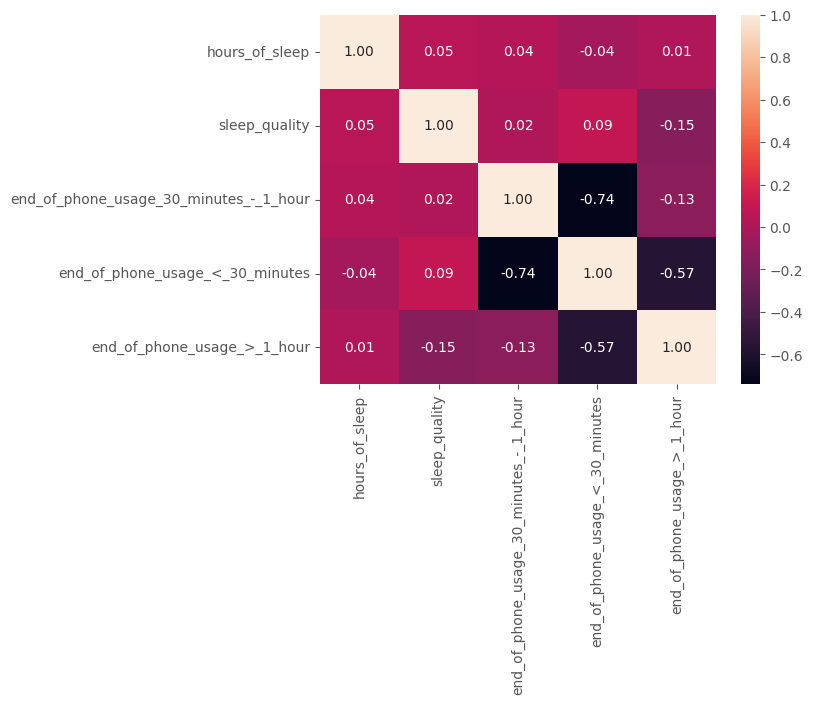

In [118]:
# Heatmap of correlations between hours of sleep, sleep quality, and phone usage before bed
df_encoded.columns
df_corr = df_encoded[
  [
    "hours_of_sleep",
    "sleep_quality",
    "end_of_phone_usage_30_minutes_-_1_hour",
    "end_of_phone_usage_<_30_minutes",
    "end_of_phone_usage_>_1_hour",
  ]
].corr()

heatmap = sns.heatmap(df_corr, annot=True, fmt=".2f")